     salary         sales   roe industry
0      1095  27595.000000  14.1  Service
1      1001   9958.000000  10.9  Service
2      1122   6125.899902  23.5  Service
3       578  16246.000000   5.9  Service
4      1368  21783.199219  13.8  Service
..      ...           ...   ...      ...
204     930   1509.099976   9.0   Others
205     525   1097.099976  15.5   Others
206     658   4542.600098  12.1   Others
207     555   2023.000000  13.7   Others
208     626   1442.500000  14.4   Others

[209 rows x 4 columns]
     salary         sales   roe industry
0      1095  27595.000000  14.1  Service
1      1001   9958.000000  10.9  Service
2      1001   6125.899902  10.9  Service
3       578   6125.899902   5.9  Service
4       578   6125.899902   5.9  Service
..      ...           ...   ...      ...
204     223    175.199997   0.5  Finance
205     223    175.199997   0.5  Finance
206     223    175.199997   0.5  Finance
207     223    175.199997   0.5  Finance
208     223    175.199997   0.5  

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

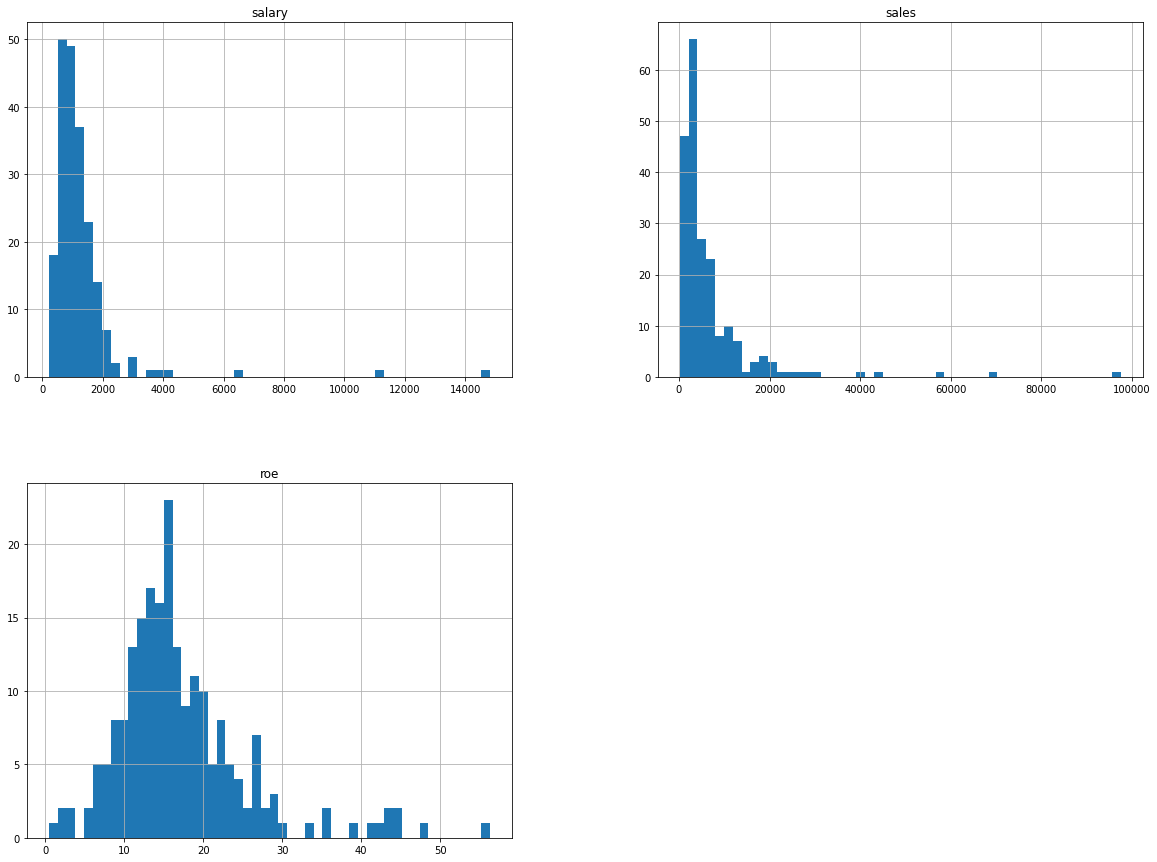

In [20]:
import numpy as np
import pandas as pd
from pandas.core.indexes.base import InvalidIndexError

data = pd.read_csv('./data2/Ex_CEOSalary.csv', encoding='utf-8')

data['industry']= data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])

cummin = data.cummin();
cummax = data.cummax();

print(data)
print(cummin)
print(cummax)

data.hist(bins=50, figsize=(20,15))